# **Task 4**

## **DJS Synapse Learning Period**
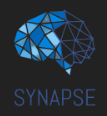

In the task for this week, we will be exploring another ML Models like Decision Tree, Random Forest and Naive Bayes. We will also learn hyperparameter tuning using ensemble techniques (Bagging & Boosting) and Decision Tree Pruning.

**This Task has various theory questions to be answered here and there. Don't miss out on those, as they will make you'll conceptually stronger, and give a better understanding.**

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

# Decision Tree Classifier

* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

Load the titanic dataset in a pandas dataframe (download dataset from https://www.kaggle.com/c/titanic/data and store it in the "Synapse" folder initially created for the interview tasks) Note that you have to download the train and test csv files seperately

<b>Read the titanic_data.csv using pandas and show the dataframe</b>

In [2]:
import pandas as pd

In [3]:
#write code here
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Visualizing hidden Details

* print the name column of the data
* notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
* extract the title using regular expression (help given below in the code)
* store the title in a new column in the dataframe. Name the column : Title

In [28]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [29]:
# try researching about regex
import re

pattern = r"\b, (.*?\.)"
titles = []

for i in train.Name:
    matc = re.search(pattern, i)
    if matc:
        titles.append(matc.group(1))
    else:
        titles.append(None)

train['Title'] = titles

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


### Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [31]:
#write code here
train.drop(columns=["PassengerId", "Ticket", "Name"], inplace=True)

In [32]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss.
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr.


### Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [47]:
#write code here
nan_percentages = (train.isna().sum() / len(train)) * 100

nan_summary = pd.DataFrame({'Column Name': train.columns, 'Percentage of NaNs': nan_percentages})

threshold = 50
columns_to_remove = nan_summary[nan_summary['Percentage of NaNs'] > threshold]['Column Name']
train_cleaned = train.drop(columns=columns_to_remove)

In [48]:
train_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [58]:
#write code here
train_cleaned['Embarked'] = train_cleaned['Embarked'].fillna(train_cleaned['Embarked'].mode()[0])

train_cleaned['Age'] = train_cleaned['Age'].fillna(train_cleaned['Age'].mean())

### Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [60]:
#write code here
train_cleaned["Family_members"] = train_cleaned["SibSp"] + train_cleaned["Parch"]

In [62]:
#Normalize the columns ("Age", "Fare", "Family_members")
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Age', 'Fare', 'Family_members']

scaler = MinMaxScaler()

train_cleaned[columns_to_normalize] = scaler.fit_transform(train_cleaned[columns_to_normalize])

train_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,0.271174,1,0,0.014151,S,Mr.,0.1
1,1,1,female,0.472229,1,0,0.139136,C,Mrs.,0.1
2,1,3,female,0.321438,0,0,0.015469,S,Miss.,0.0
3,1,1,female,0.434531,1,0,0.103644,S,Mrs.,0.1
4,0,3,male,0.434531,0,0,0.015713,S,Mr.,0.0


In [63]:
#apply one hot encoding on the columns ('Pclass','Sex','Title','Embarked')
columns_to_encode = ['Pclass','Sex','Title','Embarked']

train_cleaned = pd.get_dummies(train_cleaned, columns=columns_to_encode)

train_cleaned.head()

,Survived,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.,Title_the Countess.,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,1,0,0.014151,0.1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0.472229,1,0,0.139136,0.1,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1,0.321438,0,0,0.015469,0.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,1,0,0.103644,0.1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,0.434531,0,0,0.015713,0.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [64]:
#write code here
y_label = train_cleaned.Survived

<b>remove the y_label (survived) from the dataframe</b>

In [65]:
#write code here
train_cleaned.drop(columns=['Survived'], inplace=True)

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [67]:
#write code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_cleaned, y_label, test_size=0.3, random_state=42)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [68]:
#write code here
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

<b>Print the Model Accuracy</b>

In [71]:
#write code here
print("Train Accuracy: ", model.score(X_train, y_train))
print("Test Accuracy: ", model.score(X_test, y_test))

Train Accuracy:  0.9823434991974318
Test Accuracy:  0.7761194029850746


## Explain: Give a Real life Example where Decision Tree Classifier can be used.

Ans: It could be used to predict if India will win the World Cup.

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [73]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
train_acc, test_acc = [], []

for depth in range(1,10):

    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

dataset = pd.DataFrame({"max_depth": range(1,10), "train accuracy": train_acc, "test accuracy": test_acc})

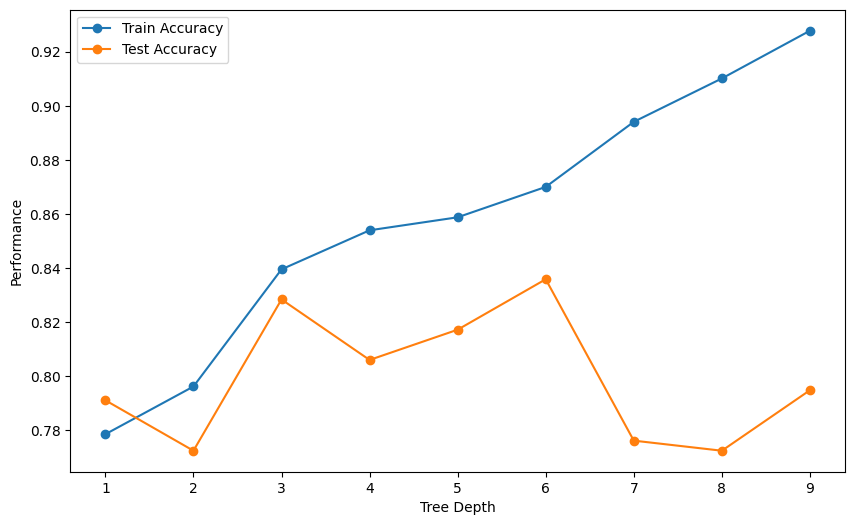

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(dataset["max_depth"], dataset["train accuracy"], marker="o", label="Train Accuracy")
plt.plot(dataset["max_depth"], dataset["test accuracy"], marker="o", label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Performance")
plt.legend()
plt.show()

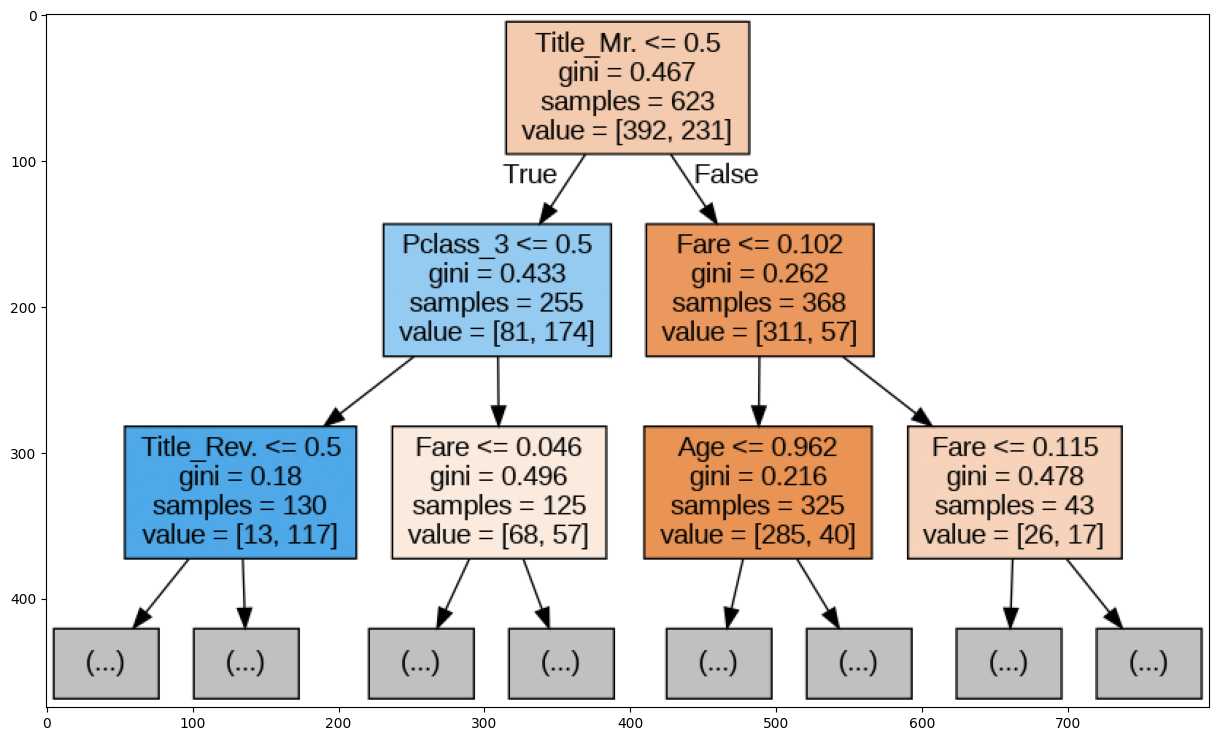

In [76]:
#complete the code below to create an image of the decision tree

model = DecisionTreeClassifier(max_depth=6, random_state=42)
model.fit(X_train, y_train)

from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(model, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [77]:
#write code here
print("Train Accuracy: ", model.score(X_train, y_train))
print("Test Accuracy: ", model.score(X_test, y_test))

Train Accuracy:  0.869983948635634
Test Accuracy:  0.835820895522388


## Explain: What is your understanding of the charts you made above?

Ans:

1.   'Title_Mr' is the root node which has the least gini score among all features.
2.    6 is the optimal maximum depth of the decision tree since after that test accuracy decreases.

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [83]:
# Write a code to implement naive bayes algorithm, and give the accuracy for the same
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [84]:
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6119402985074627
Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75       157
           1       1.00      0.06      0.12       111

    accuracy                           0.61       268
   macro avg       0.80      0.53      0.43       268
weighted avg       0.77      0.61      0.49       268



## Explain: What is the difference between Decision Tree Classifier and Naive Bayes algorithm?

Ans:

Decision Tree Classifier is based on a tree-like probability model relying of metrics like gini score. It offers great visualization and does not strictly require independent features.

Naive Bayes Algorithm is a condition probability based model relying on baye's theorem. It offers no visualization and does assumes independent features (hence the name 'Naive'). It works best for text based classification (using one hot encoding).

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [85]:
#write code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7985074626865671
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.78      0.72      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



## Explain: Under what condition will Random Forest and Decision Trees have the same accuracy?

Ans: Random Roest and Decision Trees will have same accuracy when there are minimum outliers present.

## Extra - BaggingClassifier

In [87]:
from sklearn.ensemble import BaggingClassifier

base_estimator = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)

y_pred = bagging_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7835820895522388
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.76      0.70      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



## Explain: What is the difference between Random Forest and Bagging Classifier

Ans:

Random Forest uses Decision Tree as base model but there is no such compulsion for Bagging Classifier.

There is more, well, _randomness_ in Random Forest than in Bagging Classifier.

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [90]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)

y_pred = adaboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7985074626865671
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.76      0.75      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



## Explain: What is the difference between Bagging and Boosting?

Ans:

 Bagging involves creating multiple subsets of the training data through bootstrapping (random sampling with replacement). Each subset is used to train a separate base learner. It is parallelized.

 Boosting focuses on sequentially training base learners, where each learner is trained on a weighted version of the dataset. It is sequential.

### 3. Pruning Techniques

https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107

In [106]:
#write code here
from sklearn.metrics import make_scorer,confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn import tree
import seaborn as sns

params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [113]:
classes = ['Not a survivor','survivor']

def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.8667736757624398
Test score 0.8208955223880597
Train Confusion matrix


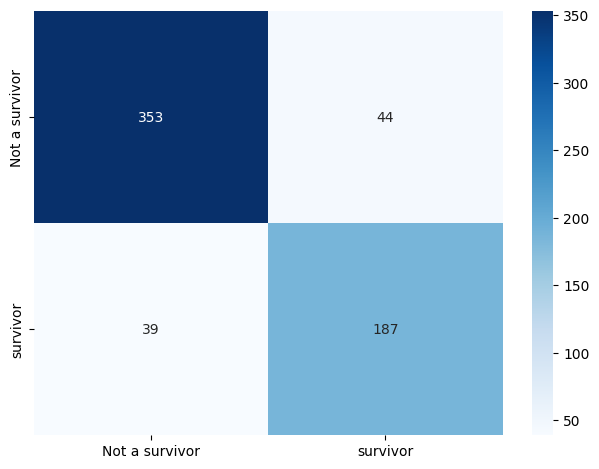

Test Confusion matrix


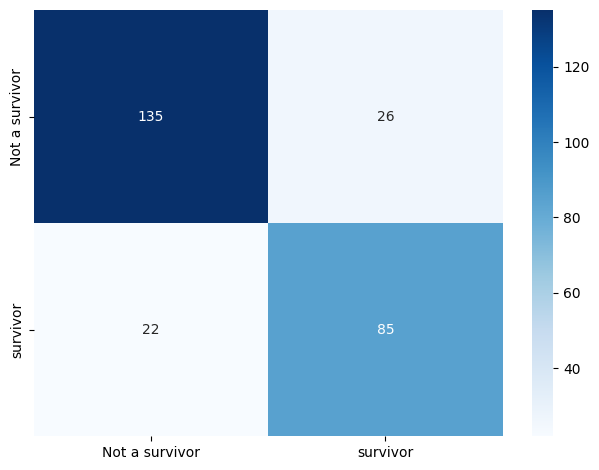

In [108]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

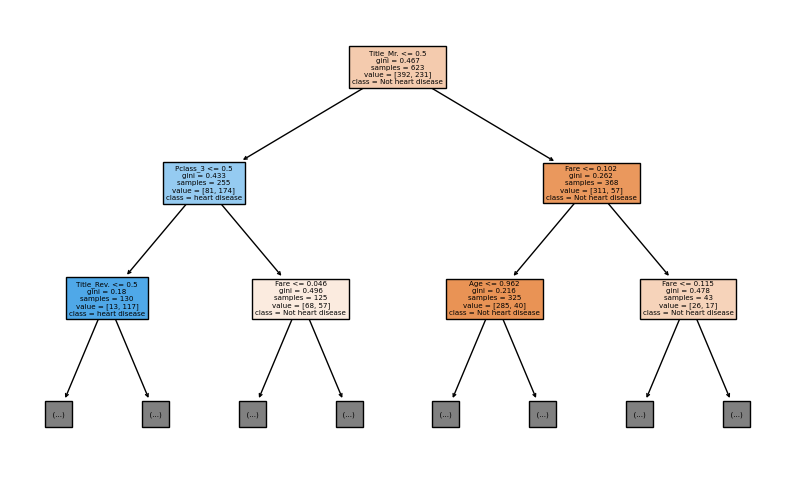

In [112]:
plt.figure(figsize=(10,6))
features = X_train.columns
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True, max_depth=2)
plt.show()

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

## Explain: After studying these techniques, analyse which method gives you the best accuracy and choose it as your most optimal model.

Ans:

Best accuracy is a toss up between a simple Decision Tree Classifier and the prepruned Classifier.

Accuracy: {PrePruned Classifier: {Train score: 0.8667736757624398,

Test score: 0.8208955223880597},

Decision Tree Classifier: {Train Accuracy:  0.869983948635634,

Test Accuracy:  0.835820895522388}}

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **XG Boost Classifier and Regressor**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2023 - 2024